In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
datos = pd.read_excel("dataset_cars.xlsx")
datos

,year,seats,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,selling_price
0,2014,5.0,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,450000
1,2014,5.0,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,370000
2,2006,5.0,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,158000
3,2010,5.0,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,225000
4,2007,5.0,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,130000
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,5.0,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,320000
8124,2007,5.0,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,135000
8125,2009,5.0,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,382000
8126,2013,5.0,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,290000


In [4]:
datos.isnull().sum()

year               0
seats            221
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
selling_price      0
dtype: int64

In [5]:
# TRATAMIENTO DE DATOS, CONVERTIMOS LAS CADENAS DE CARACTERES A ENTEROS
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
datos["fuel"] = le.fit_transform(datos["fuel"])
datos["seller_type"] = le.fit_transform(datos["seller_type"])
datos["transmission"] = le.fit_transform(datos["transmission"])
datos["owner"] = le.fit_transform(datos["owner"])

In [6]:
datos

,year,seats,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,selling_price
0,2014,5.0,145500,1,1,1,0,23.40,1248.0,74.00,450000
1,2014,5.0,120000,1,1,1,2,21.14,1498.0,103.52,370000
2,2006,5.0,140000,3,1,1,4,17.70,1497.0,78.00,158000
3,2010,5.0,127000,1,1,1,0,23.00,1396.0,90.00,225000
4,2007,5.0,120000,3,1,1,0,16.10,1298.0,88.20,130000
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,5.0,110000,3,1,1,0,18.50,1197.0,82.85,320000
8124,2007,5.0,119000,1,1,1,1,16.80,1493.0,110.00,135000
8125,2009,5.0,120000,1,1,1,0,19.30,1248.0,73.90,382000
8126,2013,5.0,25000,1,1,1,0,23.57,1396.0,70.00,290000


In [7]:
datos2 = datos.fillna(datos.mean()) # REEMPLAZAMOS LOS VALORES NAN CON SU VALOR PROMEDIO DE LA COLUMNA
datos2

,year,seats,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,selling_price
0,2014,5.0,145500,1,1,1,0,23.40,1248.0,74.00,450000
1,2014,5.0,120000,1,1,1,2,21.14,1498.0,103.52,370000
2,2006,5.0,140000,3,1,1,4,17.70,1497.0,78.00,158000
3,2010,5.0,127000,1,1,1,0,23.00,1396.0,90.00,225000
4,2007,5.0,120000,3,1,1,0,16.10,1298.0,88.20,130000
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,5.0,110000,3,1,1,0,18.50,1197.0,82.85,320000
8124,2007,5.0,119000,1,1,1,1,16.80,1493.0,110.00,135000
8125,2009,5.0,120000,1,1,1,0,19.30,1248.0,73.90,382000
8126,2013,5.0,25000,1,1,1,0,23.57,1396.0,70.00,290000


In [8]:
datos2.isnull().sum()

year             0
seats            0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
selling_price    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


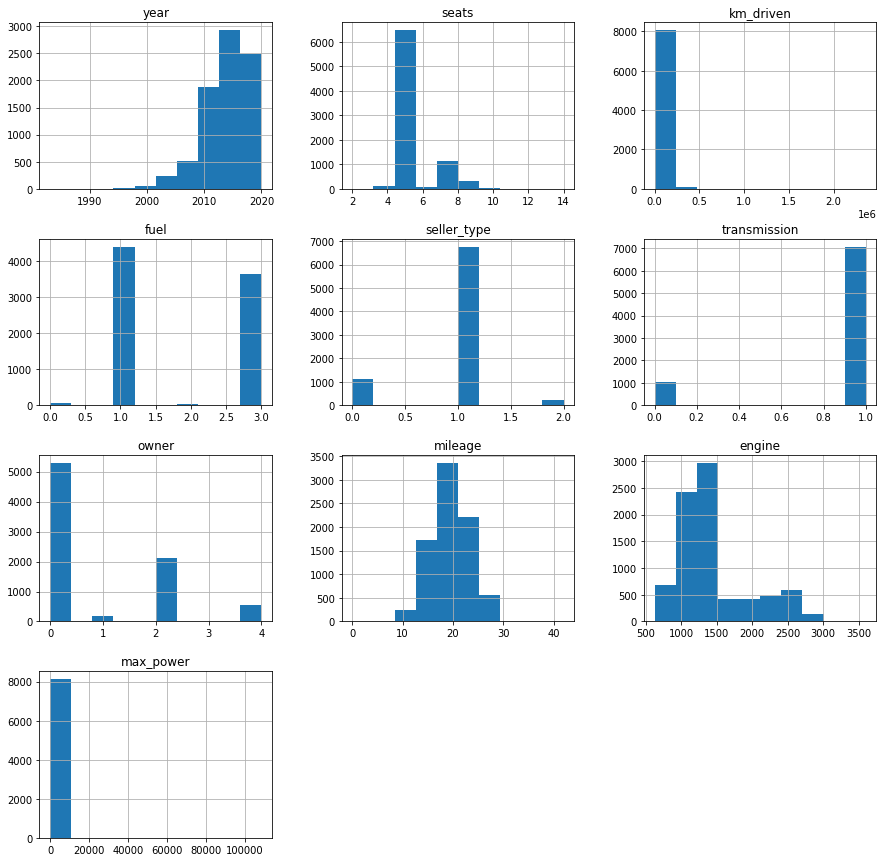

In [10]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (15, 15)        # LAS DIMENSIONES DEL GRÁFICO

datos2.drop(['selling_price'],1).hist()    # GRAFICAMOS - nos basamos en el precio del coche 
plt.show()

In [11]:
# NORMALIZACION DE DATOS
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

datos_normalizados = mean_norm(datos2)
print(datos_normalizados)

          year     seats  km_driven      fuel  seller_type  transmission  \
0     0.047977 -0.440093   1.338389 -0.889557      0.27759      0.385135   
1     0.047977 -0.440093   0.887458 -0.889557      0.27759      0.385135   
2    -1.931485 -0.440093   1.241129  1.106115      0.27759      0.385135   
3    -0.941754 -0.440093   1.011243 -0.889557      0.27759      0.385135   
4    -1.684052 -0.440093   0.887458  1.106115      0.27759      0.385135   
...        ...       ...        ...       ...          ...           ...   
8123 -0.199456 -0.440093   0.710622  1.106115      0.27759      0.385135   
8124 -1.684052 -0.440093   0.869775 -0.889557      0.27759      0.385135   
8125 -1.189187 -0.440093   0.887458 -0.889557      0.27759      0.385135   
8126 -0.199456 -0.440093  -0.792481 -0.889557      0.27759      0.385135   
8127 -0.199456 -0.440093  -0.792481 -0.889557      0.27759      0.385135   

         owner   mileage    engine  max_power  selling_price  
0    -0.666598  0.999676

In [12]:
# SELECCIONAR LAS COLUMNAS A TRABAJAR
X = datos_normalizados.iloc[:,:10]            # consideramos todas las columnas, menos la del precio
#y = datos_normalizados.iloc[:,10:]             # la columna precios 
y = datos_normalizados["selling_price"]

X

,year,seats,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power
0,0.047977,-0.440093,1.338389,-0.889557,0.27759,0.385135,-0.666598,0.999676,-0.423846,-0.035656
1,0.047977,-0.440093,0.887458,-0.889557,0.27759,0.385135,0.970540,0.431974,0.079180,-0.026374
2,-1.931485,-0.440093,1.241129,1.106115,0.27759,0.385135,2.607678,-0.432138,0.077168,-0.034398
3,-0.941754,-0.440093,1.011243,-0.889557,0.27759,0.385135,-0.666598,0.899198,-0.126054,-0.030625
4,-1.684052,-0.440093,0.887458,1.106115,0.27759,0.385135,-0.666598,-0.834051,-0.323241,-0.031191
...,...,...,...,...,...,...,...,...,...,...
8123,-0.199456,-0.440093,0.710622,1.106115,0.27759,0.385135,-0.666598,-0.231182,-0.526464,-0.032873
8124,-1.684052,-0.440093,0.869775,-0.889557,0.27759,0.385135,0.151971,-0.658214,0.069120,-0.024336
8125,-1.189187,-0.440093,0.887458,-0.889557,0.27759,0.385135,-0.666598,-0.030225,-0.423846,-0.035688
8126,-0.199456,-0.440093,-0.792481,-0.889557,0.27759,0.385135,-0.666598,1.042379,-0.126054,-0.036914


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
# REGRESION LINEAL
regresion_lineal_multiple = LinearRegression()

In [16]:
# ENTRENAMIENTO DEL ALGORITMO
a =LinearRegression().fit(X_train, y_train)

In [17]:
# LAS PREDICCIONES
y_pred = a.predict(X_test)

In [18]:
df_comparacion = pd.DataFrame({'ACTUAL': y_test, 'PREDICCION': y_pred})
df_comparacion.head(20)

,ACTUAL,PREDICCION
3079,5.595900,2.646301
7291,0.510672,1.567101
5109,-0.016455,0.030623
2210,-0.171492,-0.057750
2566,-0.419552,-0.420291
8053,-0.388545,0.174240
2434,-0.171492,-0.347714
6777,-0.047462,-0.230724
4618,-0.739549,-1.206852
4228,-0.233507,0.330106


In [27]:
from sklearn import metrics
print('Error absoluto medio:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Error medio cuadrado:', metrics.mean_squared_error(y_test, y_pred))   # funcion costo = error cuadratico xd
print('Error cuadrático medio de la raíz:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error absoluto medio: 0.3628524556143936
Error medio cuadrado: 0.40111401452094947
Error cuadrático medio de la raíz: 0.6333356254948473


In [20]:
nuestra_pred = ([[0.047977, -0.440093, 1.338389, -0.889557, 0.27759, 0.385135, -0.666598, 0.999676, -0.423846, -0.035656]])
nuestra_pred2 = ([[2014, 5, 145500, 1, 1, 1, 0, 23.40, 1248, 74]])

In [21]:
print("NUESTRA PREDICCION: ", a.predict(nuestra_pred))

NUESTRA PREDICCION:  [-0.31978695]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [23]:
data_exportar = pd.DataFrame(datos_normalizados)
data_exportar.to_excel('normalizacion_datos.xlsx', sheet_name='sheet1', index=False)

In [24]:
w = a.coef_ #trae todo los pesos de los 'w'

In [25]:
w

array([ 0.25274711, -0.20470296, -0.08432016, -0.04060139, -0.15257626,
       -0.32678178, -0.01251881,  0.01356436,  0.47761706, -0.02105745])

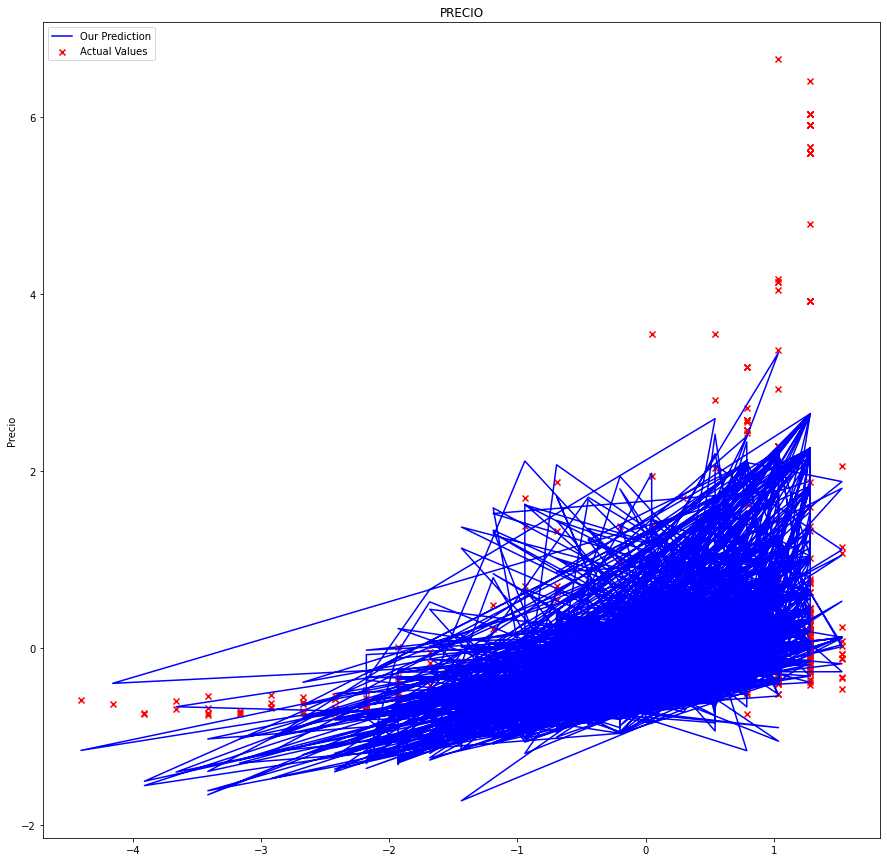

In [26]:
# Plot our model prediction
plt.plot(X_test.iloc[:,[0]], y_pred, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(X_test.iloc[:,[0]], y_test, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("PRECIO")
# Set the y-axis label
plt.ylabel('Precio')
# Set the x-axis label
plt.xlabel("")
plt.legend()
plt.show()